In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Visualizing Geographic Data
---
_by Dataquest Labs, Inc. - All rights reserved © 2019_

### __`airlines.csv`__ - data on each airline:

- __`country`__ - where the airline is headquartered.
- __`activev`__ - if the airline is still active.

### __`airports.csv`__ - data on each airport:

- __`name`__ - name of the airport.
- __`city`__ - city the airport is located.
- __`country`__ - country the airport is located.
- __`code`__ - unique airport code.
- __`latitude`__ - latitude value.
- __`longitude`__ - longitude value.

### __`routes.csv`__ - data on each flight route:

- __`airline`__ - airline for the route.
- __`source`__ - starting city for the route.
- __`dest`__ - destination city for the route.

---
## We can explore a range of interesting questions and ideas using these datasets:

- For each airport, which destination airport is the most common?
-  Which cities are the most important hubs for airports and airlines?

---

## Instructions

- Read in the 3 CSV files into 3 separate dataframe objects - `airlines`, `airports`, and `routes`.
- Display the first rows for all dataframes. 
- Try to answer the following questions:
    - What's the best way to link the data from these 3 different datasets together?
    - What are the formats of the latitude and longitude values?

In [2]:
airlines = pd.read_csv('airlines.csv')

airports = pd.read_csv('airports.csv')
routes = pd.read_csv('routes.csv')

---
## `airlines` :

In [3]:
airlines.head(3)

,id,name,alias,iata,icao,callsign,country,active
0,1,Private flight,\N,-,NaN,NaN,NaN,Y
1,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y


In [4]:
print(''' # of rows: {} \n # of columns {}'''.format(airlines.shape[0], airlines.shape[1]))

 # of rows: 6048 
 # of columns 8


In [5]:
airlines.describe(include = 'all')

,id,name,alias,iata,icao,callsign,country,active
count,6048.000000,6048,5614,1461,5961,5305,6033,6048
unique,NaN,5959,138,1090,5766,5215,276,3
top,NaN,Star Air,\N,1I,\N,Inc.,United States,N
freq,NaN,5,5477,7,165,20,1080,4886
mean,3844.729167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3945.495487,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1512.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3025.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4543.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
airlines.shape

(6048, 8)

In [7]:
airlines.isnull().sum()

id             0
name           0
alias        434
iata        4587
icao          87
callsign     743
country       15
active         0
dtype: int64

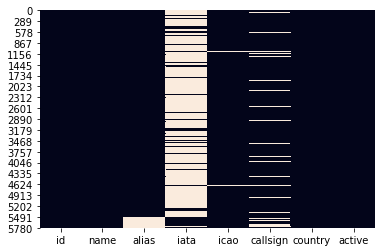

In [8]:
sns.heatmap(airlines.isnull(), cbar=False);

---
## `airports`:

In [9]:
airports.head(3)

,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby


In [10]:
print(''' # of rows: {} \n # of columns {}'''.format(airports.shape[0], airports.shape[1]))

 # of rows: 8107 
 # of columns 12


In [11]:
airports.describe(include = 'all')

,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
count,8107.000000,8107,8107,8107,5880,8043,8107.000000,8107.000000,8107.000000,8107.000000,8107,8107
unique,NaN,7908,6977,240,5878,6782,NaN,NaN,NaN,NaN,7,294
top,NaN,North Sea,London,United States,ZYA,\N,NaN,NaN,NaN,NaN,U,America/New_York
freq,NaN,16,21,1697,2,1258,NaN,NaN,NaN,NaN,2195,628
mean,4766.361046,NaN,NaN,NaN,NaN,NaN,26.817720,-3.921969,933.449365,0.169236,NaN,NaN
std,2943.205193,NaN,NaN,NaN,NaN,NaN,27.866953,85.900873,1624.740899,5.737326,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,-89.999997,-179.877000,-1266.000000,-12.000000,NaN,NaN
25%,2091.500000,NaN,NaN,NaN,NaN,NaN,8.824928,-79.022498,38.000000,-5.000000,NaN,NaN
50%,4257.000000,NaN,NaN,NaN,NaN,NaN,34.987800,5.292028,272.000000,1.000000,NaN,NaN
75%,7508.500000,NaN,NaN,NaN,NaN,NaN,47.957599,49.785821,1020.000000,4.000000,NaN,NaN


In [12]:
airports.isnull().sum()

id              0
name            0
city            0
country         0
code         2227
icao           64
latitude        0
longitude       0
altitude        0
offset          0
dst             0
timezone        0
dtype: int64

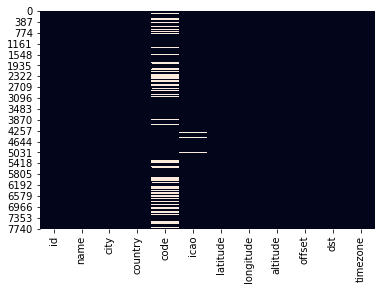

In [13]:
sns.heatmap(airports.isnull(), cbar=False);

---
## `routes`:

In [14]:
routes.head(3)

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2


In [15]:
print(''' # of rows: {} \n # of columns {}'''.format(routes.shape[0], routes.shape[1]))

 # of rows: 67663 
 # of columns 9


In [16]:
routes.describe(include = 'all')

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
count,67663,67663,67663,67663,67663,67663,14597,67663.000000,67645
unique,568,541,3409,3271,3418,3276,1,NaN,3945
top,FR,4296,ATL,3682,ATL,3682,Y,NaN,320
freq,2484,2484,915,915,911,911,14597,NaN,9180
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000163,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012749,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN


In [17]:
routes.isnull().sum()

airline           0
airline_id        0
source            0
source_id         0
dest              0
dest_id           0
codeshare     53066
stops             0
equipment        18
dtype: int64

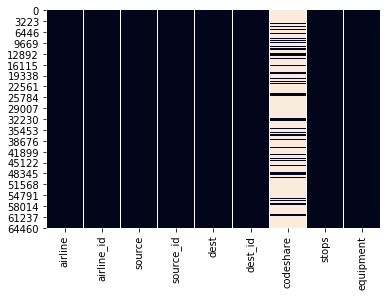

In [18]:
sns.heatmap(routes.isnull(), cbar=False);

# Map projection
---

## Instructions

1. Create a new basemap instance with the following parameters:

    - `projection: "merc"`
    - `llcrnrlat: -80 degrees`
    - `urcrnrlat: 80 degrees`
    - `llcrnrlon: -180 degrees`
    - `urcrnrlon: 180 degrees`

2. Assign the instance to the new variable `m`.

#### Solution:

In [19]:
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

In [20]:
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.


---
## Instructions

1. Convert the longitude values from spherical to Cartesian and assign the resulting list to `x`.
2. Convert the latitude values from spherical to Cartesian and assign the resulting list to `y`.

#### Solution:

In [21]:
longitudes = airports.longitude.tolist()
latitudes = airports.latitude.tolist()

x, y = m(longitudes, latitudes)

# `m.scatter(x,y)`
_m is basecamp_

---
Now that the data is in the right format, we can plot the coordinates on a map. A scatter plot is the simplest way to plot points on a map, where each point is represented as an (x, y) coordinate pair. To create a scatter plot from a list of `x` and `y` coordinates, we use the __[`basemap.scatter()` method](https://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.scatter)__.

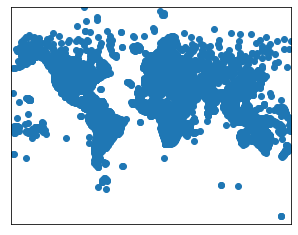

In [22]:
m.scatter(x,y);

The __`basemap.scatter()`__ method has similar parameters to the __[`pyplot.scatter()`](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)__. For example, we can customize the size of each marker using the s parameter:

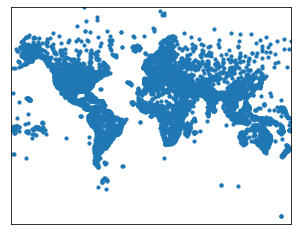

In [23]:
# Large markers.
m.scatter(x,y,s=10);

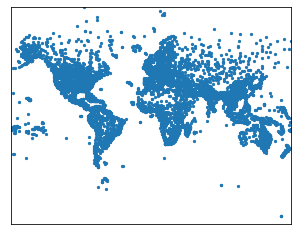

In [24]:
# Smaller markers.
m.scatter(x,y,s=5);

After we've created the scatter plot, use `plt.show()` to display the plot. We'll dive more into customizing the plot in the next step but now, create a simple scatter plot.



---
## Instructions

- Create a scatter plot using the converted latitude and longitude values using a marker size of 1.
- Display the scatter plot.

#### Solution:

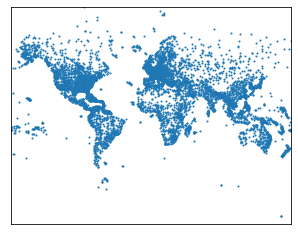

In [25]:
m.scatter(x,y,s=1);

# `basemap.drawcoastlines()`

---
You'll notice that the outlines of the coasts for each continent are missing from the map above. We can display the coast lines using the __[`basemap.drawcoastlines()` method](https://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.drawcoastlines).__



---
## Instructions

- Use __`basemap.drawcoastlines()`__ to enable the coast lines to be displayed.
- Display the plot using `plt.show()`.

#### Solution:

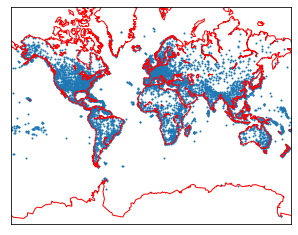

In [26]:
m.scatter(x,y,s=1);
m.drawcoastlines(linewidth=1.0, color='r');

---
Because basemap uses matplotlib under the hood, __we can interact with the matplotlib classes__ that basemap uses directly to customize the appearance of the map.

We can add code that:

- uses __`pyplot.subplots()`__ to specify the figsize parameter
- returns the Figure and Axes object for a single subplot and assigns to `fig` and `ax` respectively
- use the __`Axes.set_title()`__ method to set the map title

---
## Instructions

- Before creating the basemap instance and generating the scatter plot, add code that:
    - creates a figure with a height of `20` inches and a width of `15` inches
    - sets the `title` of the scatter plot to `"Scaled Up Earth With Coastlines"`

#### Solution:

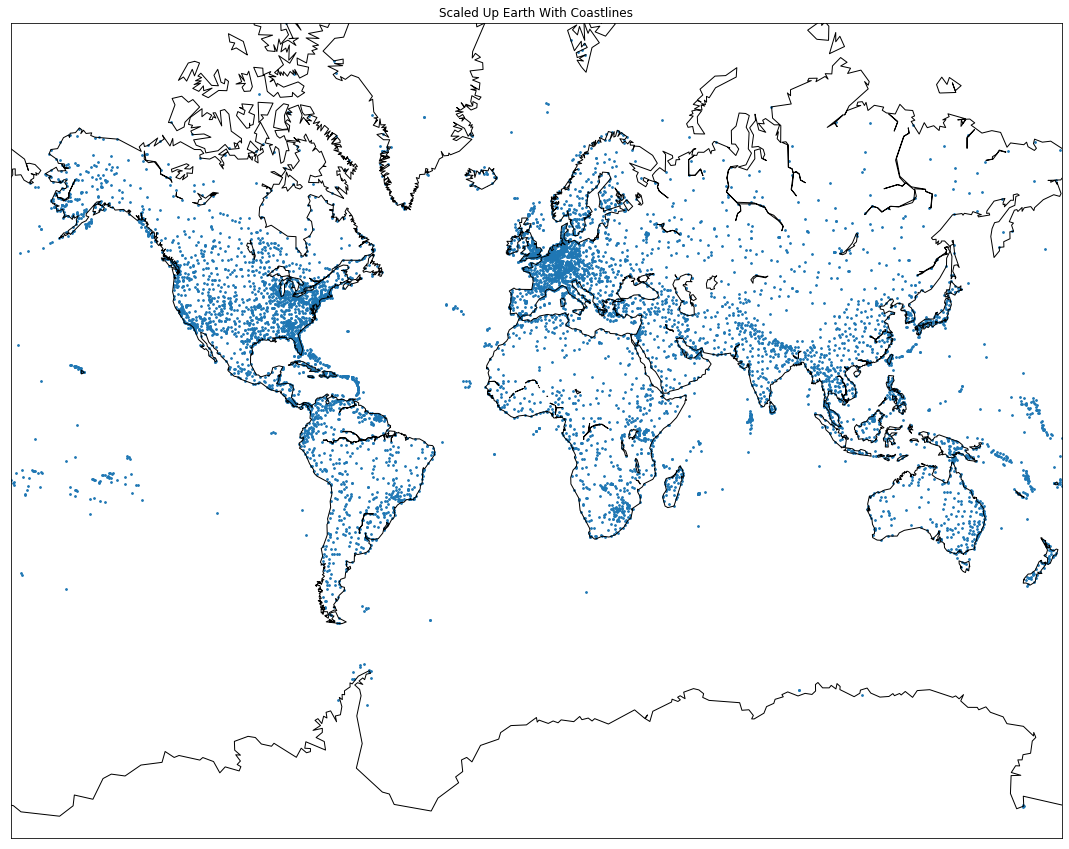

In [27]:
fig, ax = plt.subplots(figsize=(20,15))
plt.title('Scaled Up Earth With Coastlines');

m.scatter(x, y, s=3)
m.drawcoastlines(linewidth=1.0);

---
## Instructions

1. Read `geo_routes.csv` into a dataframe named `geo_routes`.
2. Use the `DataFrame.info()` method to look for columns containing any null values.
3. Display the first five rows in `geo_routes`.

#### Solution:

In [28]:
geo_routes = pd.read_csv('geo_routes.csv')

In [29]:
geo_routes.head(2)

,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,2B,AER,KZN,CR2,39.956589,49.278728,43.449928,55.606186
1,2B,ASF,KZN,CR2,48.006278,49.278728,46.283333,55.606186


In [30]:
print(''' # of rows: {} \n # of columns {}'''.format(geo_routes.shape[0], geo_routes.shape[1]))

 # of rows: 67428 
 # of columns 8


In [31]:
geo_routes.isnull().sum()

airline       0
source        0
dest          0
equipment    18
start_lon     0
end_lon       0
start_lat     0
end_lat       0
dtype: int64

# `basemap.drawgreatcircle()`
---

We use the __[`basemap.drawgreatcircle()` method](https://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.drawgreatcircle)__ to display a great circle between 2 points. The __`basemap.drawgreatcircle()`__ method requires four parameters in the following order:

- __`lon1`__ - longitude of the starting point.
- __`lat1`__ - latitude of the starting point.
- __`lon2`__ - longitude of the ending point.
- __`lat2`__ - latitude of the ending point.

The following code generates a great circle for the first three routes in the dataframe:

`m.drawgreatcircle(39.956589, 43.449928, 49.278728, 55.606186)` <br>
`m.drawgreatcircle(48.006278, 46.283333, 49.278728, 55.606186)` <br>
`m.drawgreatcircle(39.956589, 43.449928, 43.081889 , 44.225072)` <br>

Unfortunately, basemap struggles to create great circles for routes that have an absolute difference of larger than 180 degrees for either the latitude or longitude values. This is because the __`basemap.drawgreatcircle()`__ method isn't able to create great circles properly when they go outside of the map boundaries. This is mentioned briefly in the __[documentation](https://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.drawgreatcircle)__ for the method:

- __Note:__ _Cannot handle situations in which the great circle intersects the edge of the map projection domain, and then re-enters the domain._

---
## Instructions

Write a function, named __`create_great_circles()`__ that draws a great circle for each route that has an absolute difference in the latitude and longitude values less than 180. This function should:

- Accept a dataframe as the sole parameter
- Iterate over the rows in the dataframe using __`DataFrame.iterrows()`__
- For each row:

    - Draw a great circle using the four geographic coordinates __only if__:

        - __The absolute difference between the latitude values (`end_lat` and `start_lat`) is `less than 180`.__
        - __If the absolute difference between the longitude values (`end_lon` and `start_lon`) is `less than 180`.__

- Create a filtered dataframe containing just the routes that start at the DFW airport.

    - Select only the rows in `geo_routes` where the value for the source column equals `"DFW"`.
    - Assign the resulting dataframe to `dfw`.

- Pass dfw into `create_great_circles()` and display the plot using the `pyplot.show()` function.

- Uncomment the first three lines of code.

##### Draw a great circle on the map from the longitude-latitude pair `lon1,lat1` to `lon2,lat2`

- __`lon1`__ - longitude of the starting point.
- __`lat1`__ - latitude of the starting point.
- __`lon2`__ - longitude of the ending point.
- __`lat2`__ - latitude of the ending point.


#### Solution:

In [32]:
geo_routes.head(2)

,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,2B,AER,KZN,CR2,39.956589,49.278728,43.449928,55.606186
1,2B,ASF,KZN,CR2,48.006278,49.278728,46.283333,55.606186


In [33]:
geo_routes.columns

Index(['airline', 'source', 'dest', 'equipment', 'start_lon', 'end_lon',
       'start_lat', 'end_lat'],
      dtype='object')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


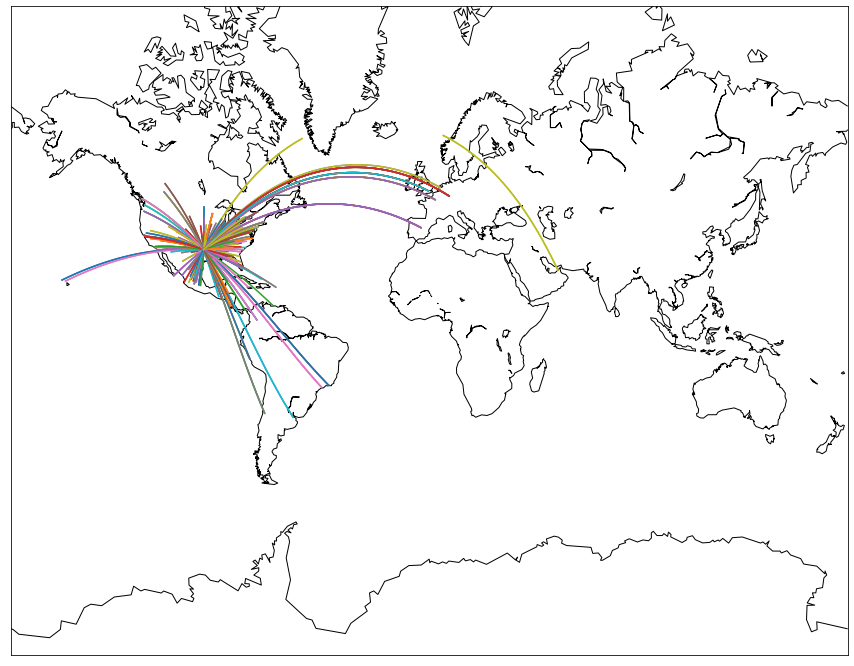

In [34]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

# Start writing your solution below this line

def create_great_circles(df):
    for ind, row  in df.iterrows():
        end_lat = row.end_lat
        start_lat = row.start_lat
        
        end_lon = row.end_lon
        start_lon = row.start_lon
        
        lat_dif = end_lat - start_lat
        lon_dif = end_lon - start_lon
        
        if lat_dif < 180 and lon_dif<180:
            m.drawgreatcircle(start_lon,start_lat,end_lon,end_lat)
            
DFW = geo_routes[geo_routes.source == 'DFW']

create_great_circles(DFW)